# CAPSTONE PROJECT: SNAPDEAL Price Prediction Analysis

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 1: LOAD SCRAPED CSV DATA

In [3]:
df = pd.read_csv("snapdeal_shoes.csv")

In [4]:
df

,Name,Price,MRP,Discount,Rating,Reviews
0,Campus SNIPER LIGHT GREY Men's Sports Running ...,Rs. 807,Rs. 1949,59% Off,4.3,163.0
1,ASIAN TITAAN-06 Off White Men's Sports Running...,Rs. 717,Rs. 1999,64% Off,4.3,712.0
2,Campus ZURIK PRO Blue Men's Sports Running Shoes,Rs. 827,Rs. 1999,59% Off,4.3,653.0
3,hotstyle Gray Men's Sports Running Shoes,Rs. 512,Rs. 2249,77% Off,4.0,826.0
4,ASIAN NAVIGATOR-02 White Men's Sports Running ...,Rs. 841,Rs. 2999,72% Off,4.3,217.0
...,...,...,...,...,...,...
1595,PENNEN Blue Men's Sports Running Shoes,Rs. 490,Rs. 999,51% Off,5.0,1.0
1596,Impakto Beige Men's Sports Running Shoes,Rs. 949,Rs. 3609,74% Off,3.3,3.0
1597,Campus STREME Navy Men's Sports Running Shoes,Rs. 857,Rs. 1899,55% Off,4.4,90.0
1598,PENNEN Gray Men's Sports Running Shoes,Rs. 352,Rs. 999,65% Off,NaN,NaN


In [5]:
df.shape

(1600, 6)

In [6]:
df.describe()

,Rating,Reviews
count,1551.000000,1551.000000
mean,4.216183,403.751773
std,0.305586,1140.422911
min,3.000000,1.000000
25%,4.100000,15.000000
50%,4.200000,69.000000
75%,4.300000,295.500000
max,5.000000,16708.000000


In [7]:
df.isnull().sum()

Name         0
Price        0
MRP          0
Discount     0
Rating      49
Reviews     49
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1600 non-null   object 
 1   Price     1600 non-null   object 
 2   MRP       1600 non-null   object 
 3   Discount  1600 non-null   object 
 4   Rating    1551 non-null   float64
 5   Reviews   1551 non-null   float64
dtypes: float64(2), object(4)
memory usage: 75.1+ KB


## PHASE 2: DATA CLEANING & PREPROCESSING

In [9]:
# STEP 1: Duplicates Removal :
df.drop_duplicates(subset=["Name", "Price", "MRP", "Discount", "Rating", "Reviews"], inplace=True)
df

,Name,Price,MRP,Discount,Rating,Reviews
0,Campus SNIPER LIGHT GREY Men's Sports Running ...,Rs. 807,Rs. 1949,59% Off,4.3,163.0
1,ASIAN TITAAN-06 Off White Men's Sports Running...,Rs. 717,Rs. 1999,64% Off,4.3,712.0
2,Campus ZURIK PRO Blue Men's Sports Running Shoes,Rs. 827,Rs. 1999,59% Off,4.3,653.0
3,hotstyle Gray Men's Sports Running Shoes,Rs. 512,Rs. 2249,77% Off,4.0,826.0
4,ASIAN NAVIGATOR-02 White Men's Sports Running ...,Rs. 841,Rs. 2999,72% Off,4.3,217.0
...,...,...,...,...,...,...
1595,PENNEN Blue Men's Sports Running Shoes,Rs. 490,Rs. 999,51% Off,5.0,1.0
1596,Impakto Beige Men's Sports Running Shoes,Rs. 949,Rs. 3609,74% Off,3.3,3.0
1597,Campus STREME Navy Men's Sports Running Shoes,Rs. 857,Rs. 1899,55% Off,4.4,90.0
1598,PENNEN Gray Men's Sports Running Shoes,Rs. 352,Rs. 999,65% Off,NaN,NaN


In [10]:
# STEP 2: Clean Columns

# Clean Price and MRP columns
for col in ['Price', 'MRP']:
    df[col] = (df[col].astype(str).str.replace(r'Rs\.|\s|', '', regex=True) 
    .astype(float))


### STEP 3: FEATURE ENGINEERING

In [11]:
# Convert Discount to numeric
df["Discount"] = (
    df["Discount"]
      .astype(str)
      .str.replace(r"%|Off", "", regex=True)
      .str.strip()
)

df["Discount"] = pd.to_numeric(df["Discount"], errors="coerce")

# Rename column
df.rename(columns={"Discount": "Disc_Per"}, inplace=True)
df['Disc_Per'] = df['Disc_Per'] / 100

# Calculate Discount_Price 
df["Discount_Price"]= df["MRP"]-df["Price"]

In [41]:
# Handle missing values 

# Rating Column
df["Rating"] = df["Rating"].fillna(df["Rating"].median()).round(2)

# Reviews Column
reviews_mode = df['Reviews'].mode()[0]
df['Reviews'].fillna(reviews_mode, inplace=True)

In [13]:
df

,Name,Price,MRP,Disc_Per,Rating,Reviews,Discount_Price
0,Campus SNIPER LIGHT GREY Men's Sports Running ...,807.0,1949.0,0.59,4.3,163.0,1142.0
1,ASIAN TITAAN-06 Off White Men's Sports Running...,717.0,1999.0,0.64,4.3,712.0,1282.0
2,Campus ZURIK PRO Blue Men's Sports Running Shoes,827.0,1999.0,0.59,4.3,653.0,1172.0
3,hotstyle Gray Men's Sports Running Shoes,512.0,2249.0,0.77,4.0,826.0,1737.0
4,ASIAN NAVIGATOR-02 White Men's Sports Running ...,841.0,2999.0,0.72,4.3,217.0,2158.0
...,...,...,...,...,...,...,...
1595,PENNEN Blue Men's Sports Running Shoes,490.0,999.0,0.51,5.0,1.0,509.0
1596,Impakto Beige Men's Sports Running Shoes,949.0,3609.0,0.74,3.3,3.0,2660.0
1597,Campus STREME Navy Men's Sports Running Shoes,857.0,1899.0,0.55,4.4,90.0,1042.0
1598,PENNEN Gray Men's Sports Running Shoes,352.0,999.0,0.65,4.2,5.0,647.0


In [14]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1405 entries, 0 to 1599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1405 non-null   object 
 1   Price           1405 non-null   float64
 2   MRP             1405 non-null   float64
 3   Disc_Per        1405 non-null   float64
 4   Rating          1405 non-null   float64
 5   Reviews         1405 non-null   float64
 6   Discount_Price  1405 non-null   float64
dtypes: float64(6), object(1)
memory usage: 87.8+ KB


Name              0
Price             0
MRP               0
Disc_Per          0
Rating            0
Reviews           0
Discount_Price    0
dtype: int64

## PHASE 3: EXPLORATORY DATA ANALYSIS 

### A) PRICE ANALYSIS

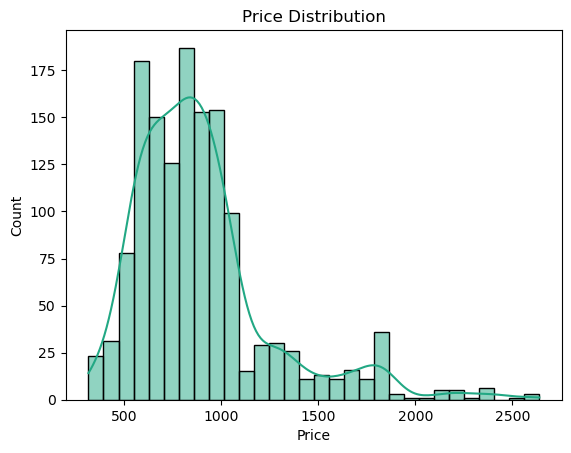

In [15]:
# 1) PRICE DISTRIBUTION

palette = sns.color_palette("viridis", as_cmap=True)
sns.histplot(df["Price"], bins=30, kde=True, color=palette(0.6))
plt.title("Price Distribution")
plt.show()

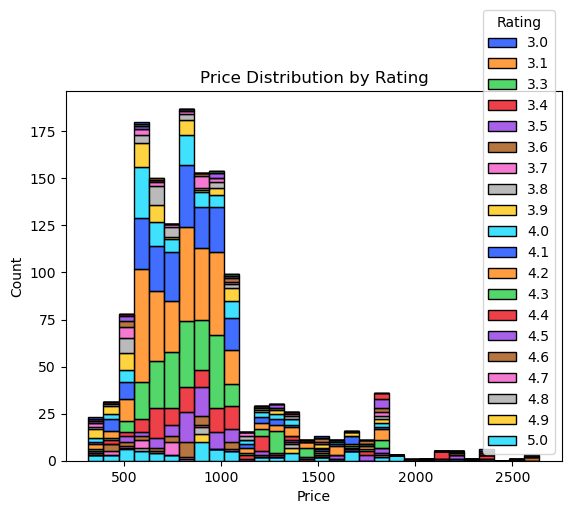

In [16]:
# 2) PRICE DISTRIBUTION BY RATING

sns.histplot(data=df,x='Price', bins=30,hue='Rating',multiple= 'stack',palette='bright')
plt.title("Price Distribution by Rating")
plt.show()


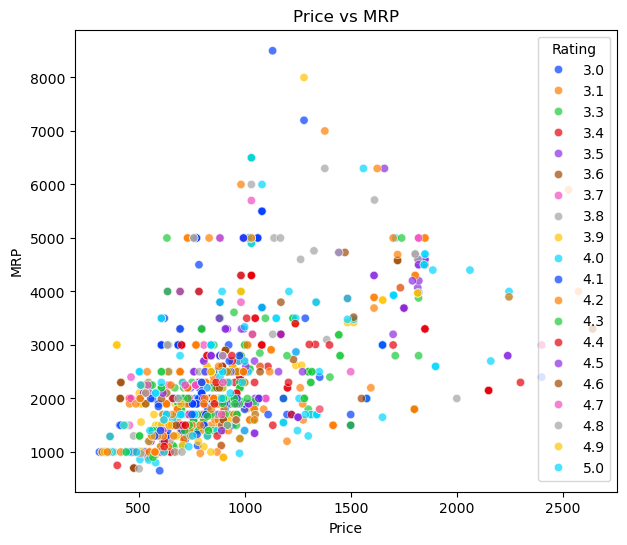

In [17]:
# 3) PRICE VS MRP

plt.figure(figsize=(7,6))
sns.scatterplot(x="Price", y="MRP", hue='Rating',data=df,palette="bright", alpha=0.7)
plt.title("Price vs MRP")
plt.xlabel("Price")
plt.ylabel("MRP")
plt.show()

### B) DISCOUNT ANALYSIS

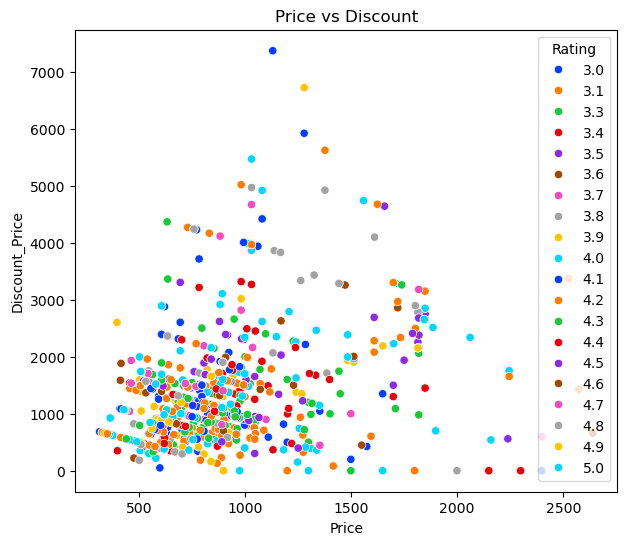

In [18]:
# 1) PRICE Vs DISCOUNT

plt.figure(figsize=(7,6))
sns.scatterplot(x='Price', y='Discount_Price',hue='Rating',data=df, palette='bright')
plt.title("Price vs Discount")
plt.show()

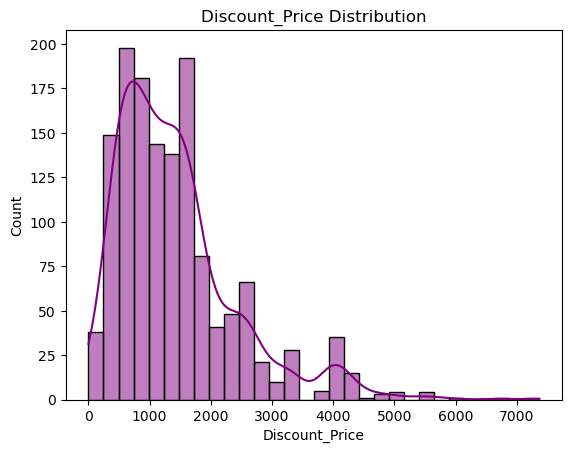

In [19]:
# 2) DISCOUNT DISTRIBUTION

plt.figure()
sns.histplot(df["Discount_Price"], bins=30,kde=True, color="purple")
plt.title("Discount_Price Distribution")
plt.xlabel("Discount_Price")
plt.show()

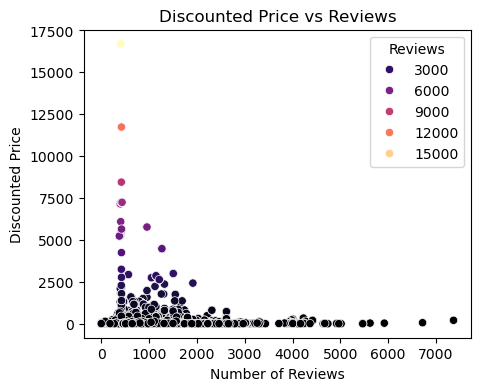

In [20]:
# DISCOUNT_PRICE VS REVIEWS

plt.figure(figsize=(5,4))
sns.scatterplot(x="Discount_Price", y="Reviews",hue='Reviews',palette='magma',data=df)
plt.xlabel("Number of Reviews")
plt.ylabel("Discounted Price")
plt.title("Discounted Price vs Reviews")
plt.show()

### C) REVIEW & RATING ANALYSIS

Text(0, 0.5, 'Product Name')

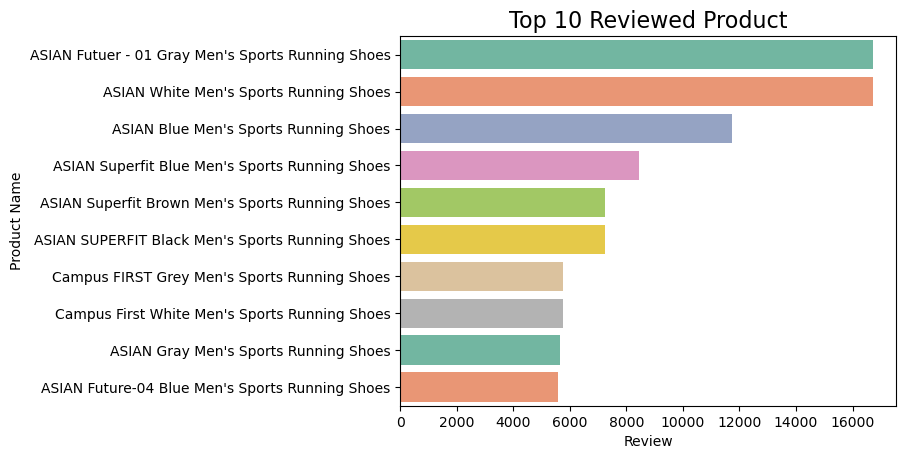

In [21]:
# 1) TOP 10 REVIEWED PRODUCTS

top_10_reviewed = (
    df.sort_values("Reviews", ascending=False)
      .drop_duplicates(subset="Name")
      .head(10))

sns.barplot(
    x="Reviews",
    y="Name",
    data=top_10_reviewed,
    palette="Set2",
    errorbar=None)

plt.title("Top 10 Reviewed Product", fontsize=16)
plt.xlabel("Review")
plt.ylabel("Product Name")

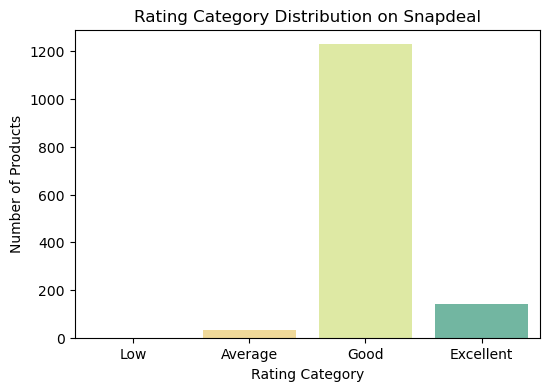

In [22]:
# 2) RATING DISTRIBUTION

df["Rating_Bucket"] = pd.cut(
    df["Rating"],
    bins=[0, 2.5, 3.5, 4.5, 5],
    labels=["Low", "Average", "Good", "Excellent"]
)

plt.figure(figsize=(6,4))
sns.countplot(x="Rating_Bucket", data=df, palette="Spectral")

plt.title("Rating Category Distribution on Snapdeal")
plt.xlabel("Rating Category")
plt.ylabel("Number of Products")
plt.show()


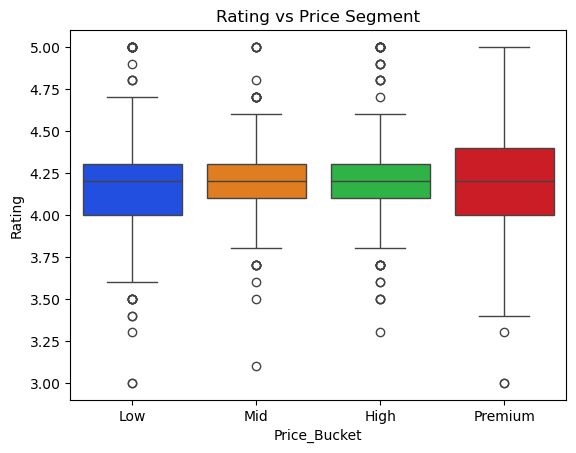

In [23]:
# 3) PRICE BUCKET Vs RATING

df["Price_Bucket"] = pd.qcut(df["Price"], q=4, labels=["Low","Mid","High","Premium"])
plt.style.use('default')
sns.boxplot(x="Price_Bucket", y="Rating", data=df, palette='bright')
plt.title("Rating vs Price Segment")
plt.show()

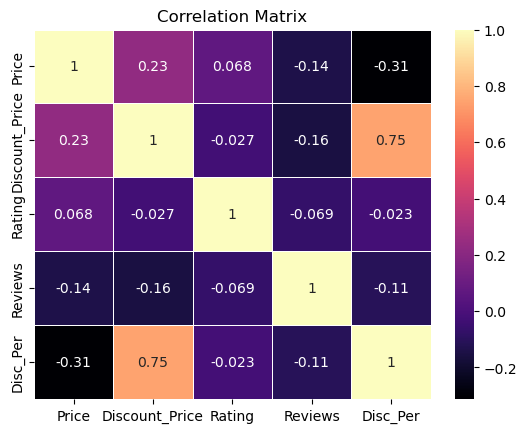

In [24]:
# Correlation Heatmap

numeric_cols = ['Price', 'Discount_Price', 'Rating', 'Reviews','Disc_Per']
plt.style.use('default')
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='magma', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### KEY INSIGHTS:
* Price Distribution
   - Product prices are right-skewed, with most products priced in the affordable to mid-range segment.
   - A few high-priced products act as outliers, likely representing premium brands or specialized footwear.
   - Majority of customer demand appears concentrated in lower price brackets.
* Mid-priced products often receive high ratings, showing value-for-money preference.
* Certain brands consistently maintain higher average ratings, indicating stronger customer trust.
* Low-rated products often show fewer reviews, suggesting lower visibility or demand.

# PHASE 4: MACHINE LEARNING MODEL

## MODEL 1: PRICE PREDICTION (Random Forest Regressor)

In [25]:
# STEP 1: Import Required Data Modelling Libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
# Load Cleaned Dataset
df = pd.read_csv("snapdeal_cleaned_data.csv")
df

,Name,Price,MRP,Disc_Per,Rating,Reviews,Discount_Price
0,Campus SNIPER LIGHT GREY Men's Sports Running ...,807.0,1949.0,0.59,4.3,163.0,1142.0
1,ASIAN TITAAN-06 Off White Men's Sports Running...,717.0,1999.0,0.64,4.3,712.0,1282.0
2,Campus ZURIK PRO Blue Men's Sports Running Shoes,827.0,1999.0,0.59,4.3,653.0,1172.0
3,hotstyle Gray Men's Sports Running Shoes,512.0,2249.0,0.77,4.0,826.0,1737.0
4,ASIAN NAVIGATOR-02 White Men's Sports Running ...,841.0,2999.0,0.72,4.3,217.0,2158.0
...,...,...,...,...,...,...,...
1400,PENNEN Blue Men's Sports Running Shoes,490.0,999.0,0.51,5.0,1.0,509.0
1401,Impakto Beige Men's Sports Running Shoes,949.0,3609.0,0.74,3.3,3.0,2660.0
1402,Campus STREME Navy Men's Sports Running Shoes,857.0,1899.0,0.55,4.4,90.0,1042.0
1403,PENNEN Gray Men's Sports Running Shoes,352.0,999.0,0.65,4.2,5.0,647.0


In [42]:
# STEP 2: Determine Feature and Target

X = df[['MRP', 'Rating', 'Reviews','Disc_Per']]  # Features
y = df['Price']  # Target

In [46]:
# Train-Test Split (80% Training- 20% Testing)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [29]:
# STEP 3: Initialize the Random Forest Regressor

rf = RandomForestRegressor(
    n_estimators=200,    # number of trees
    max_depth=None,     
    random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [30]:
# STEP 4: Prediction
y_pred = rf.predict(X_test)

In [47]:
# Compare Actual_Price vs Predicted_Price
results = pd.DataFrame({
    'Actual_Price': y_test.values,
    'Predicted_Price': y_pred
})

print(results.head(10))


   Actual_Price  Predicted_Price
0         883.0          893.070
1         730.0          745.840
2         782.0          781.255
3         476.0          392.470
4         934.0          930.390
5         807.0          803.160
6         754.0          754.295
7         890.0          893.445
8         614.0          606.030
9         732.0          732.120


In [32]:
# STEP 5: Model Evaluation

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 18.246716361633624
Root Mean Squared Error: 53.09720046342122
R² Score: 0.977449707447492


In [33]:
y_train_pred = rf.predict(X_train)

# Test predictions
y_test_pred = rf.predict(X_test)

print("TRAIN R2:", r2_score(y_train, y_train_pred))
print("TEST R2 :", r2_score(y_test, y_test_pred))

TRAIN R2: 0.9987471946739161
TEST R2 : 0.977449707447492


In [49]:
# Extract feature importance values

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
3,Disc_Per,0.526888
0,MRP,0.464304
2,Reviews,0.005703
1,Rating,0.003105


### RANDOM FOREST MODEL INSIGHTS:
* R² ≈ 0.97 indicates an excellent fit, explaining almost all variability in the target.
* Low MAE (~18) shows predictions are very close to actual values on average.
* RMSE > MAE suggests a few larger errors, but overall prediction accuracy is very strong.
* The model captures complex non-linear patterns effectively.
* Feature importance analysis revealed that MRP and discount-related variables were the most influential predictors of price.


# MODEL 2: K-MEANS CLUSTERING

In [34]:
# Step 5.1: Clustering features

features = df[['Price', 'Reviews', 'Rating']]

In [35]:
# Step 5.2: Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

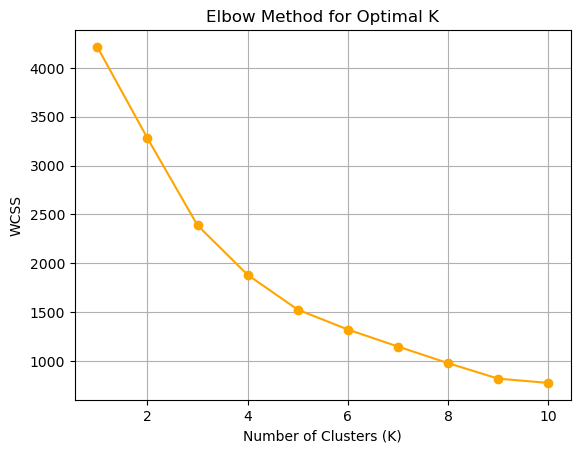

In [36]:
# Step 5.3: Elbow Method to Find Optimal K

from sklearn.cluster import KMeans

wcss = [] # Within-Cluster Sum of Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
    
# Plot Elbow Curve
plt.figure()
plt.plot(range(1, 11), wcss, marker='o',color='orange')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

In [37]:
# 5.4: Apply K-Means

# From elbow curve, choose K = 3 
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [38]:
# Mean values of each cluster

cluster_summary = df.groupby('Cluster')[['Price', 'Reviews', 'Rating']].mean()
cluster_summary

,Price,Reviews,Rating
Cluster,,,
0,1609.893939,43.075758,4.251010
1,627.750000,6848.666667,4.087500
2,778.422654,266.992392,4.212933


In [39]:
cluster_names = {
    0: "High-Price, Low-Engagement Products",
    1: "Budget High-Volume Products",
    2: "Value-for-Money Segment"
}

df['Cluster_Name'] = df['Cluster'].map(cluster_names)
df['Cluster_Name'].value_counts()


Cluster_Name
Value-for-Money Segment                1183
High-Price, Low-Engagement Products     198
Budget High-Volume Products              24
Name: count, dtype: int64

In [40]:
df.head()

,Name,Price,MRP,Disc_Per,Rating,Reviews,Discount_Price,Cluster,Cluster_Name
0,Campus SNIPER LIGHT GREY Men's Sports Running ...,807.0,1949.0,0.59,4.3,163.0,1142.0,2,Value-for-Money Segment
1,ASIAN TITAAN-06 Off White Men's Sports Running...,717.0,1999.0,0.64,4.3,712.0,1282.0,2,Value-for-Money Segment
2,Campus ZURIK PRO Blue Men's Sports Running Shoes,827.0,1999.0,0.59,4.3,653.0,1172.0,2,Value-for-Money Segment
3,hotstyle Gray Men's Sports Running Shoes,512.0,2249.0,0.77,4.0,826.0,1737.0,2,Value-for-Money Segment
4,ASIAN NAVIGATOR-02 White Men's Sports Running ...,841.0,2999.0,0.72,4.3,217.0,2158.0,2,Value-for-Money Segment


## Cluster-wise Insights:

### Cluster 0 – High-Price, Low-Engagement Products
* Highest average price (~₹1609)
* Low review count
* Strong rating (~4.25)

--> Represents premium-priced products with good quality but limited customer reach or visibility.

### Cluster 1 – Budget High-Volume Products
* Lowest average price (~₹628)
* Extremely high reviews
* Slightly lower rating (~4.09)
  
--> Indicates mass-market, budget-friendly products with very high demand, where volume outweighs marginal quality differences.

### Cluster 2 – Value-for-Money Segment
* Mid-range price (~₹778)
* Moderate review count
* Consistently high rating (~4.21)

--> Represents balanced products offering good quality at reasonable prices, appealing to value-conscious customers.

## BUSINESS INSIGHT:

1. **Product price is primarily driven by MRP and discount strategy**

**Insight:**
Feature importance analysis from the Random Forest model showed that MRP and discount-related variables were the strongest predictors of the final selling price.

**Business Meaning:**
- *MRP and discounts drive final price* → Pricing strategy should focus on smart MRP setting and controlled discounts to maximize revenue.

2. **Higher discounts increase visibility but not customer satisfaction**

**Insight:**
Products offering higher discounts attracted more attention and reviews, but did not consistently receive higher ratings.

**Business Meaning:**
- *High discounts boost visibility, not satisfaction* → Discounts attract customers, but quality determines long-term success.

3. **Customer reviews indicate demand stability**

**Insight:**
Products with a large number of reviews consistently showed higher engagement and demand, regardless of discount level.

**Business Meaning:**
- *More reviews signal higher trust and demand* → Encouraging genuine reviews can improve conversions.

4. **Ratings and reviews influence demand more than price prediction**

**Insight:**
Ratings and reviews had lower feature importance for predicting price but were strongly related to customer engagement.

**Business Meaning:**
- *Ratings influence demand more than price* → Improving product quality increases sales even without heavy discounts.

5. **Product quality has a stronger impact on ratings than price**

**Insight:**
Products with higher ratings were often found in the mid-price range rather than the cheapest segment.

**Business Meaning:**
- *Mid-priced products perform better in ratings* → Customers prefer value for money over the cheapest options.

# FINAL RECOMMENDATION:

* Prioritize **high-rated products with moderate review volume** to balance quality perception and growth potential.
* Avoid extreme discounting; **moderate discounts sustain ratings** while maintaining price realization.
* Improve quality checks for **high-volume, low-priced products** to prevent rating dilution at scale.
* Focus marketing on the **value-for-money segment** (mid-price, high ratings) for optimal conversions.
* Increase visibility of premium, high-rated but low-review products through targeted promotions.
* Apply **cluster-based pricing strategies** instead of uniform discounts across all products.
* Pricing is primarily driven by MRP, discount percentage making them essential model inputs.
* Low MAE confirms the model provides accurate price guidance, particularly for mid-range products.

## VIDEO LINK:
* Part 1- https://www.loom.com/share/85a508322f644af6a375feee1df2adf3
* Part 2- https://www.loom.com/share/6912271fa5ae483ebafca00041427366